# Measure temperature-density relation in snapshots

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import fake_spectra.tempdens as fake_tdr
import temperature_density as tdr
import read_gadget
import json

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/sim_plus/'
test_snap_num=1

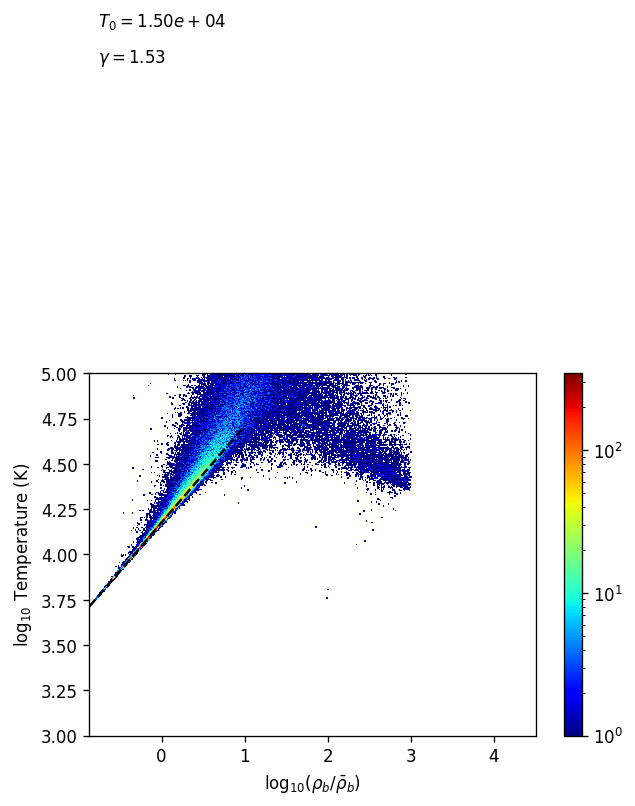

In [3]:
# try new function first
T0,gamma=fake_tdr.fit_td_rel_plot(test_snap_num, basedir+'output/', Tscale=1, gammascale=1, plot=True, use_old=False)

use old version of fit_td_rel_plot


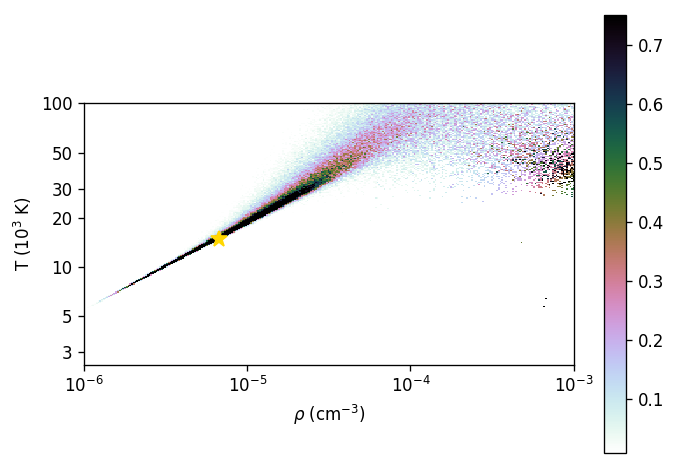

In [4]:
# try old function
T0_old,gamma_old=fake_tdr.fit_td_rel_plot(test_snap_num, basedir+'output/', Tscale=1, gammascale=1, plot=True, use_old=True)

In [5]:
print('new results',T0,gamma)
print('old results',T0_old,gamma_old)

new results 15007.1997527 1.53359316075
old results 14816.2774631 1.68304240452


### Measure TDR for all redshifts and write to JSON file

{'number': [0, 1], 'z': [4.0, 2.0], 'T0': [14196.046185853989, 15007.199752738961], 'gamma': [1.3748906541345078, 1.5335931607525222], 'zmax': 20}


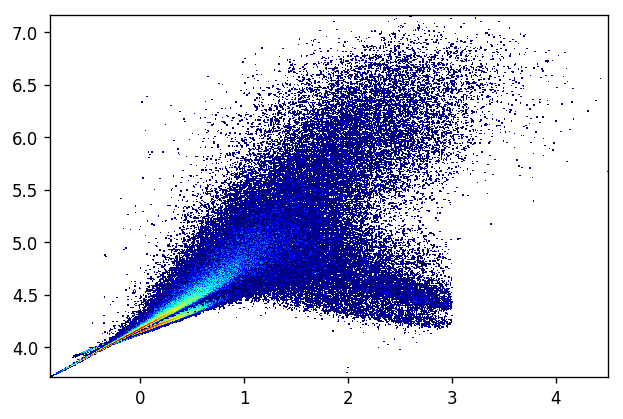

In [6]:
thermal_info=tdr.compute_TDR(basedir)
print(thermal_info)

In [7]:
filename='thermal_history.json'
json_file = open(filename,"w")
json.dump(thermal_info,json_file)
json_file.close()

Text(0.5, 1.0, 'Temperature at mean density')

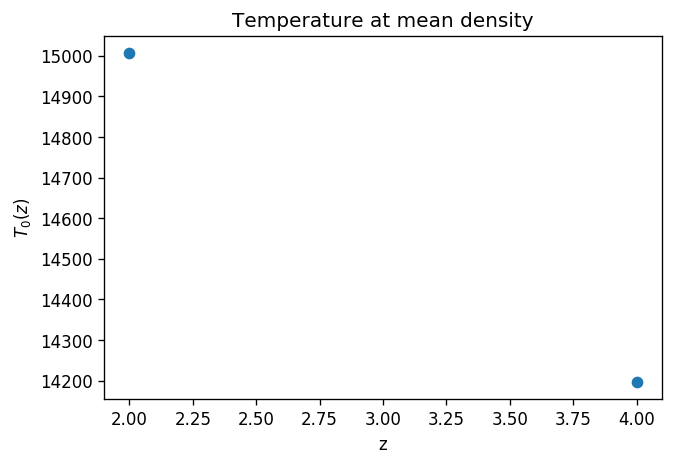

In [8]:
plt.plot(np.array(thermal_info['z']),np.array(thermal_info['T0']),'o')
plt.xlabel('z')
plt.ylabel(r'$T_0(z)$')
plt.title('Temperature at mean density')

Text(0.5, 1.0, 'Logarithmic slope in temperature-density relation')

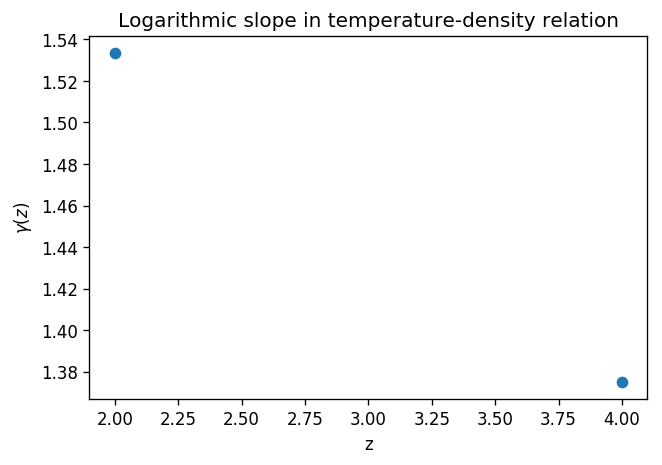

In [9]:
plt.plot(np.array(thermal_info['z']),np.array(thermal_info['gamma']),'o')
plt.xlabel('z')
plt.ylabel(r'$\gamma(z)$')
plt.title('Logarithmic slope in temperature-density relation')